In [17]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
# Read in cleaned data
df = pd.read_csv('fires_cleaned.csv')
df.head()

,year,lat,long,ha,month
0,2012,52.745783,-124.376983,1.821714,7
1,2012,52.697483,-123.010117,1.404344,7
2,2012,53.052650,-122.967000,2.017443,10
3,2012,52.512883,-122.443817,1.570430,3
4,2012,52.127933,-121.915067,1.790777,4


In [6]:
# Seperate features and target variables
X = df[['year', 'month', 'lat','long']]
y = df['ha']

In [7]:
# Split data into training and testing groups
# random_state ensures the same random split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [9]:
# fit a linear regression model to the training data
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Make predictions
predictions = lm.predict(X_test)
predictions[0:5]

array([2.00344644, 2.44999441, 2.57947814, 2.18600943, 2.26504663])

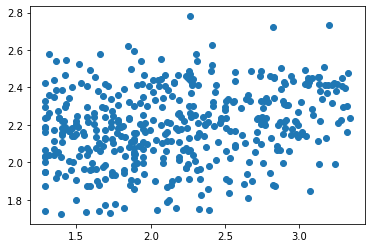

In [18]:
# This model has a very weak fit. Ideally, thr points should be close together and form diagonal line
# This is unsuprsing though because if it was easy to predict wildfires from these simple features, they wouldn't be a problem
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='ha'>

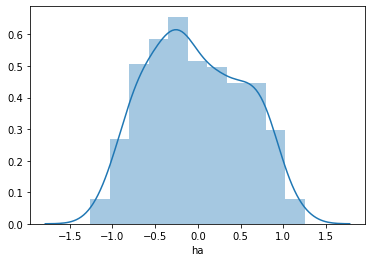

In [19]:
#histogram of residuals (diff between actual and predicted values)
# residuals are distributed fairly normally so lin model was correct
sns.distplot((y_test-predictions))

In [21]:
# Mean absolute error (average difference between true and predicted)
metrics.mean_absolute_error(y_test,predictions)

0.47715735044103863